# Imports and loading data

In [1]:
import pandas as pd
import os

# Get the current directory (analyses folder)
current_dir = os.getcwd()

# Navigate up one directory to reach the parent directory (which contains the data folder)
parent_dir = os.path.dirname(current_dir)

# Define the file paths relative to the parent directory using os.path.join
clean_huis_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_house.csv")
clean_apartement_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_app.csv")

house = pd.read_csv(clean_huis_te_koop_path, sep=",")
app = pd.read_csv(clean_apartement_te_koop_path, sep=",")

# Gathering info

In [2]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13203 entries, 0 to 13202
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             13203 non-null  int64  
 1   locality_name           13203 non-null  object 
 2   postal_code             13203 non-null  object 
 3   latitude                11392 non-null  float64
 4   longitude               11392 non-null  float64
 5   property_type           13203 non-null  object 
 6   property_subtype        13203 non-null  object 
 7   price                   13203 non-null  float64
 8   type_of_sale            13203 non-null  object 
 9   number_of_rooms         3921 non-null   float64
 10  living_area             12408 non-null  float64
 11  kitchen_type            8334 non-null   object 
 12  fully_equipped_kitchen  10126 non-null  float64
 13  furnished               4548 non-null   float64
 14  open_fire               13203 non-null

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             9786 non-null   int64  
 1   locality_name           9786 non-null   object 
 2   postal_code             9786 non-null   int64  
 3   latitude                8711 non-null   float64
 4   longitude               8711 non-null   float64
 5   property_type           9786 non-null   object 
 6   property_subtype        9786 non-null   object 
 7   price                   9786 non-null   float64
 8   type_of_sale            9786 non-null   object 
 9   number_of_rooms         2940 non-null   float64
 10  living_area             9478 non-null   float64
 11  kitchen_type            6831 non-null   object 
 12  fully_equipped_kitchen  7592 non-null   float64
 13  furnished               3969 non-null   float64
 14  open_fire               9786 non-null   

/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


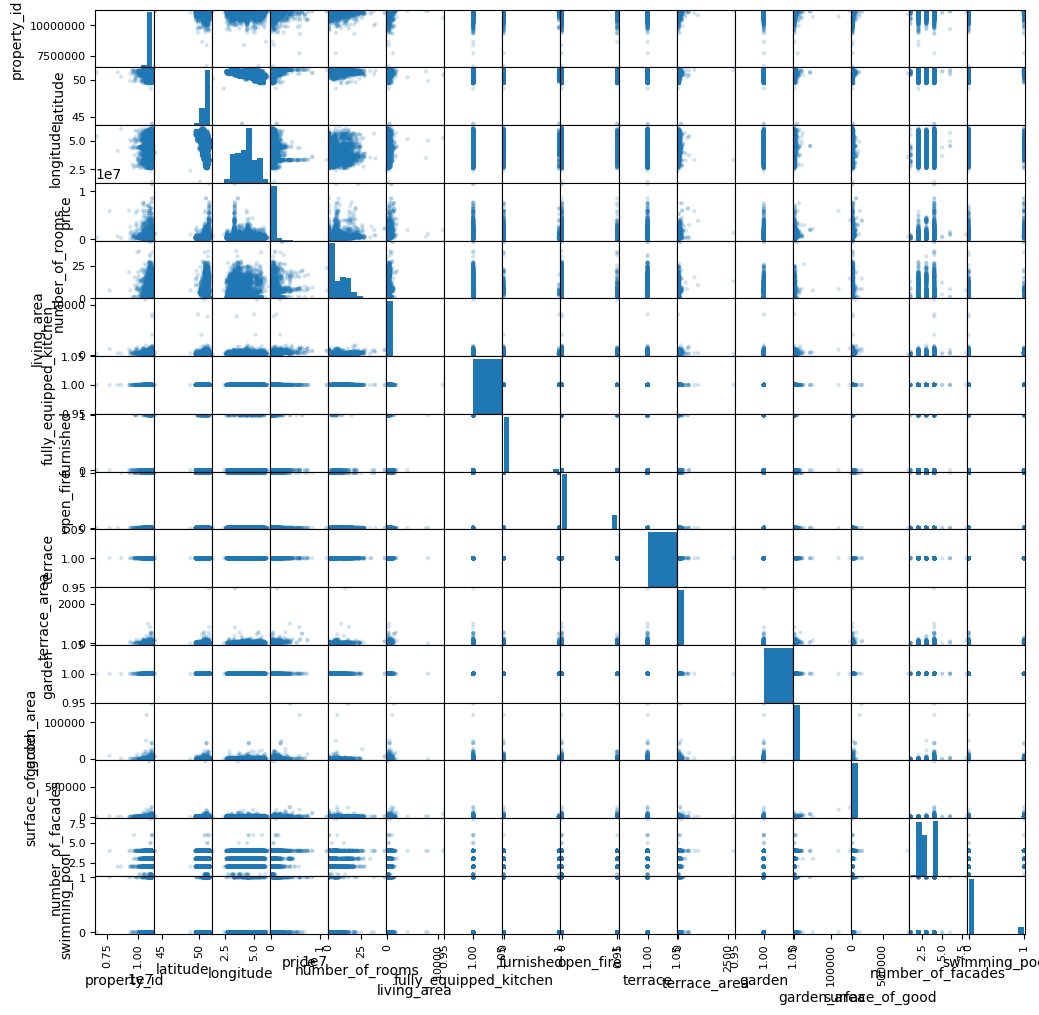

In [4]:
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz
scatter_matrix(house, alpha=0.2, figsize=(12,12));

# Matplotlib

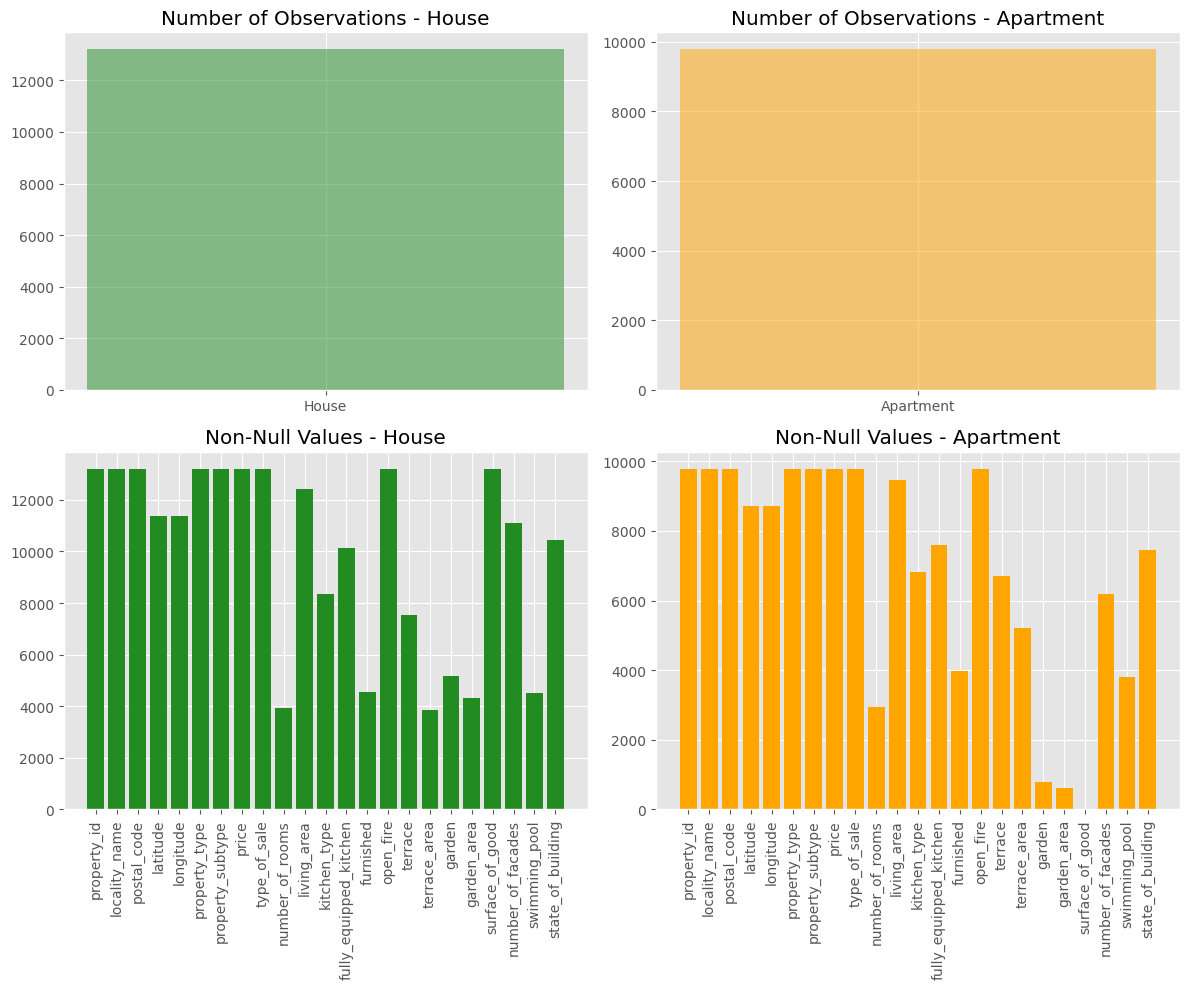

In [5]:
import matplotlib.pyplot as plt

# Define function to count non-null values in each column
def count_non_null_values(df):
    return df.notnull().sum()

# Adjust background -> define this first, before creating the figure and plots
plt.style.use('ggplot')

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


# Plot 1: Number of observations for house dataset
axes[0, 0].bar(['House'], [len(house)], alpha=0.5, color='forestgreen')
axes[0, 0].set_title('Number of Observations - House')

# Plot 2: Number of observations for apartment dataset
axes[0, 1].bar(['Apartment'], [len(app)], alpha=0.5, color='orange')
axes[0, 1].set_title('Number of Observations - Apartment')

# Plot 3: Number of non-null values for each feature in house dataset
count_house = count_non_null_values(house)
axes[1, 0].bar(count_house.index, count_house.values, color='forestgreen')
axes[1, 0].set_title('Non-Null Values - House')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Number of non-null values for each feature in apartment dataset
count_apartment = count_non_null_values(app)
axes[1, 1].bar(count_apartment.index, count_apartment.values, color='orange')
axes[1, 1].set_title('Non-Null Values - Apartment')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Matplotlib & Seaborn

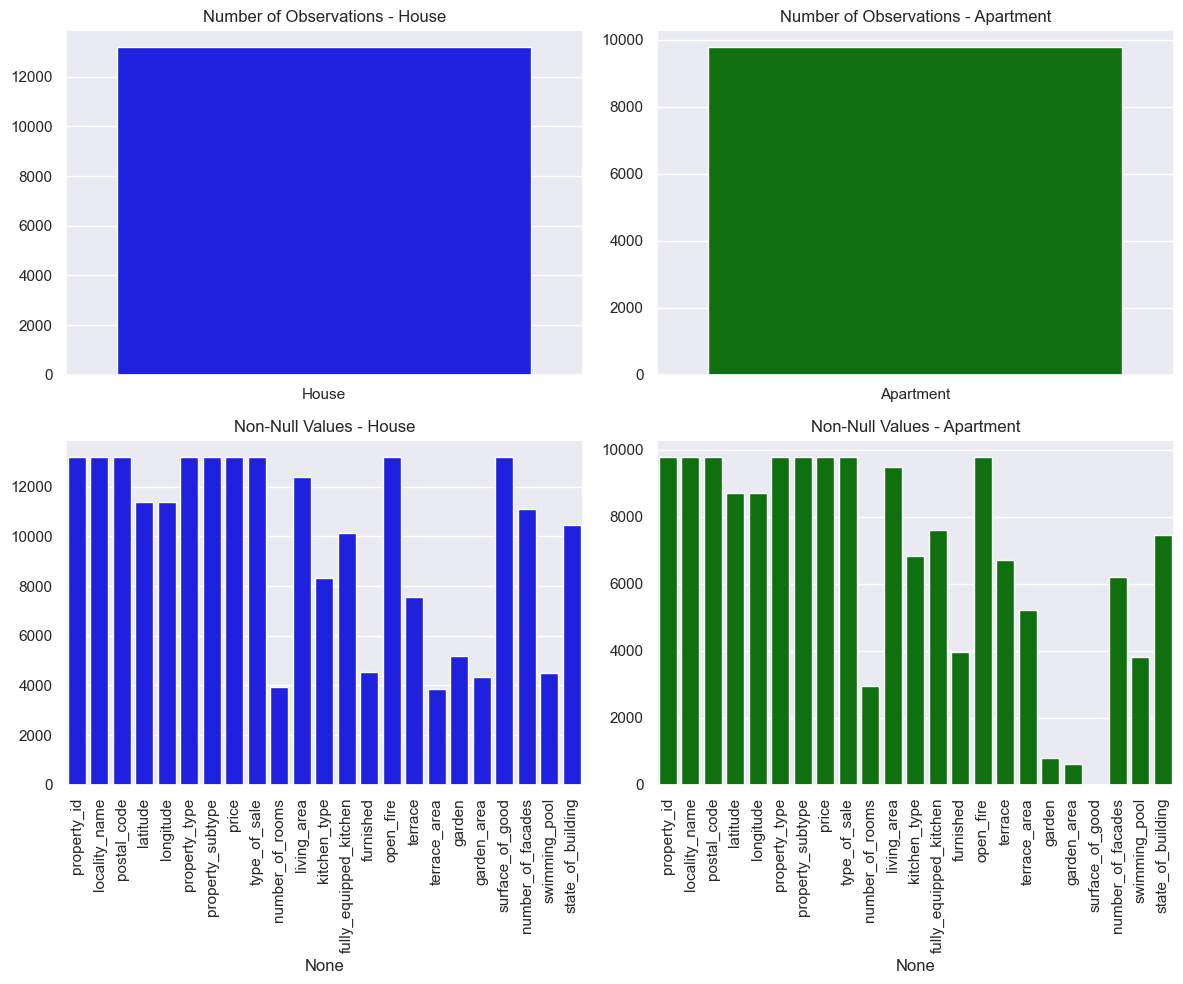

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to count non-null values in each column
def count_non_null_values(df):
    return df.notnull().sum()

sns.set_theme(style="darkgrid") 

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Number of observations for house dataset
sns.barplot(x=['House'], y=[len(house)], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Number of Observations - House')

# Plot 2: Number of observations for apartment dataset
sns.barplot(x=['Apartment'], y=[len(app)], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Number of Observations - Apartment')

# Plot 3: Number of non-null values for each feature in house dataset
count_house = count_non_null_values(house)
sns.barplot(x=count_house.index, y=count_house.values, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Non-Null Values - House')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Number of non-null values for each feature in apartment dataset
count_apartment = count_non_null_values(app)
sns.barplot(x=count_apartment.index, y=count_apartment.values, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Non-Null Values - Apartment')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# What variables are most subject to outliers?

### Approach
- create a subplot for each of the features to clearly show outliers

In [7]:
for col in house.columns:
    print("---VALUES FOR " + col + ":")
    print(house[col].value_counts())

---VALUES FOR property_id:
property_id
11157483    1
11115556    1
10978045    1
11029558    1
10978046    1
           ..
11076164    1
11082634    1
11078487    1
11085474    1
11137503    1
Name: count, Length: 13203, dtype: int64
---VALUES FOR locality_name:
locality_name
Gent                   234
Antwerpen              197
Ronse                  127
Knokke-Heist           119
Brugge                 114
                      ... 
Meerle                   1
LILLOIS-WITTERZÉE        1
Sint-Kruis (Brugge)      1
NIEUWENRODE              1
Lotenhulle               1
Name: count, Length: 2435, dtype: int64
---VALUES FOR postal_code:
postal_code
9000    206
8300    169
9600    136
9500    135
1180    123
       ... 
2030      1
4672      1
9552      1
3471      1
7521      1
Name: count, Length: 969, dtype: int64
---VALUES FOR latitude:
latitude
50.801919    10
51.328175     9
50.744586     9
51.178065     9
50.851189     8
             ..
50.413958     1
51.189575     1
50.867234     1

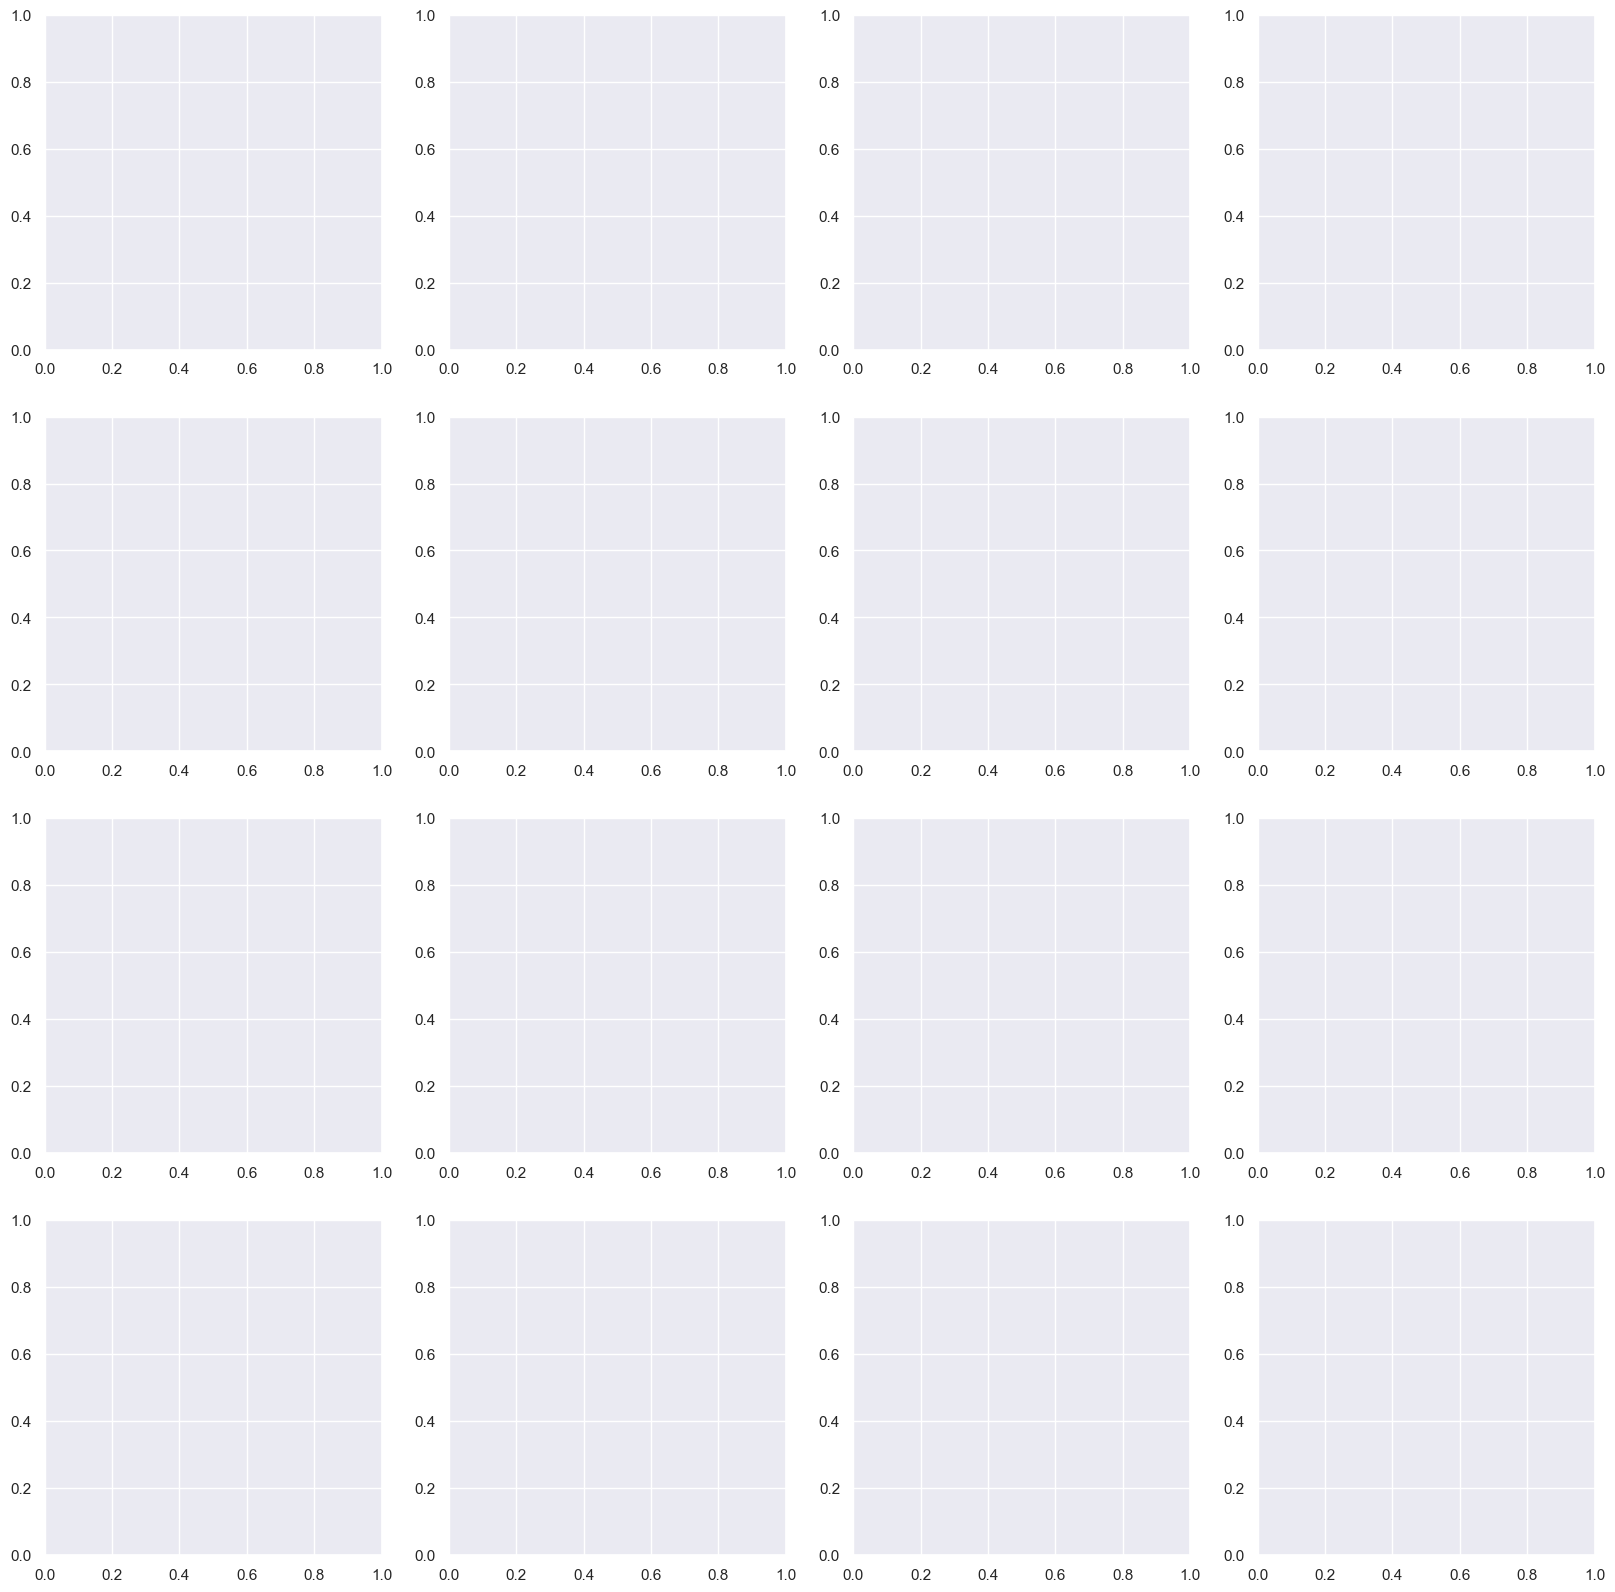

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming house is your DataFrame

# Create figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

In [9]:
house.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building'],
      dtype='object')

/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_7122/800588445.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_7122/800588445.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(

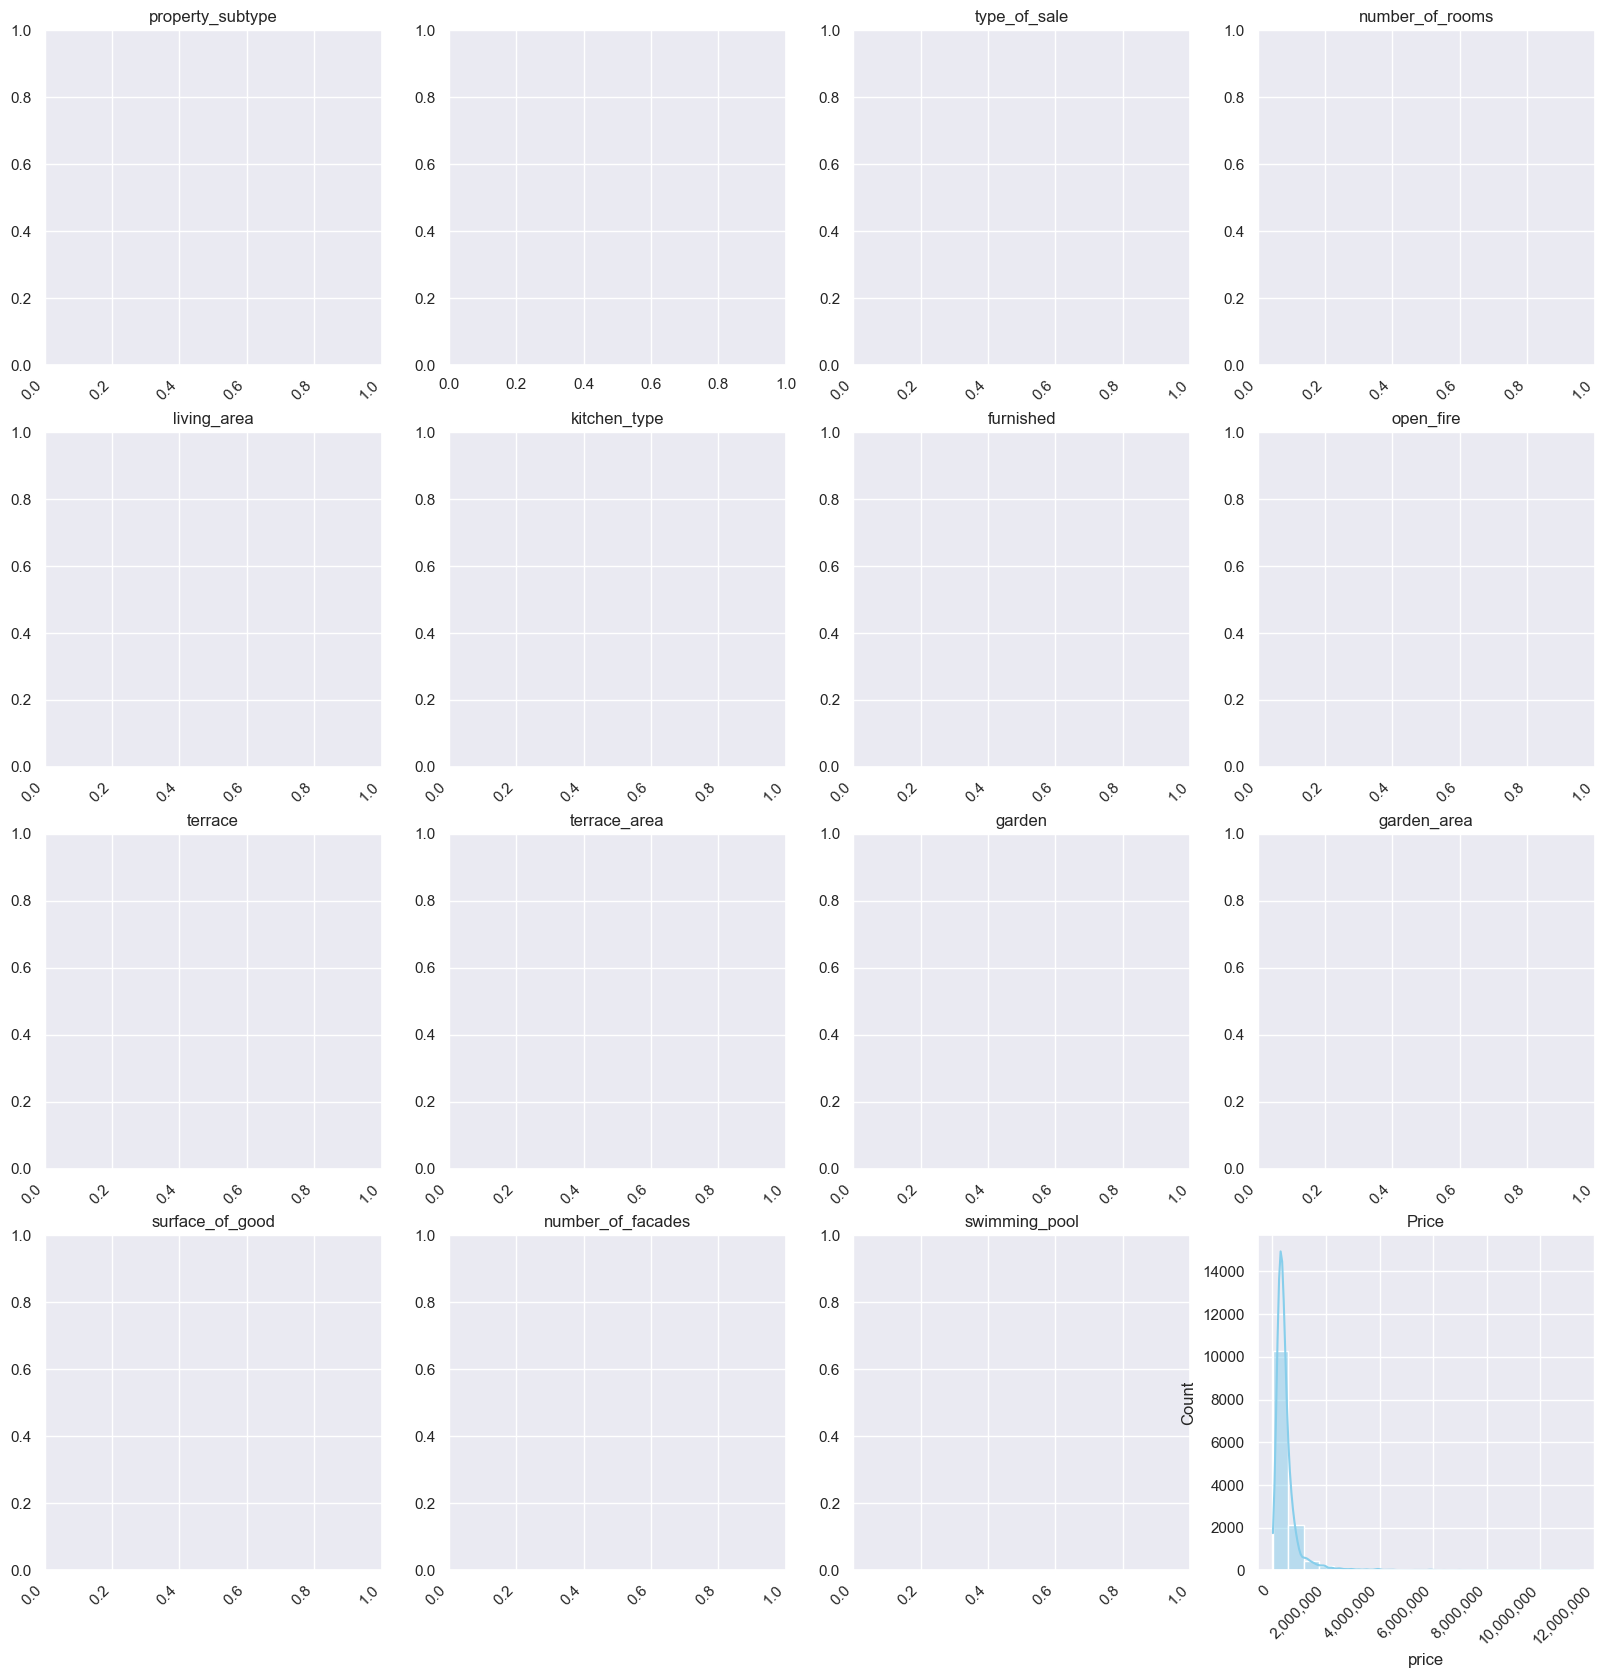

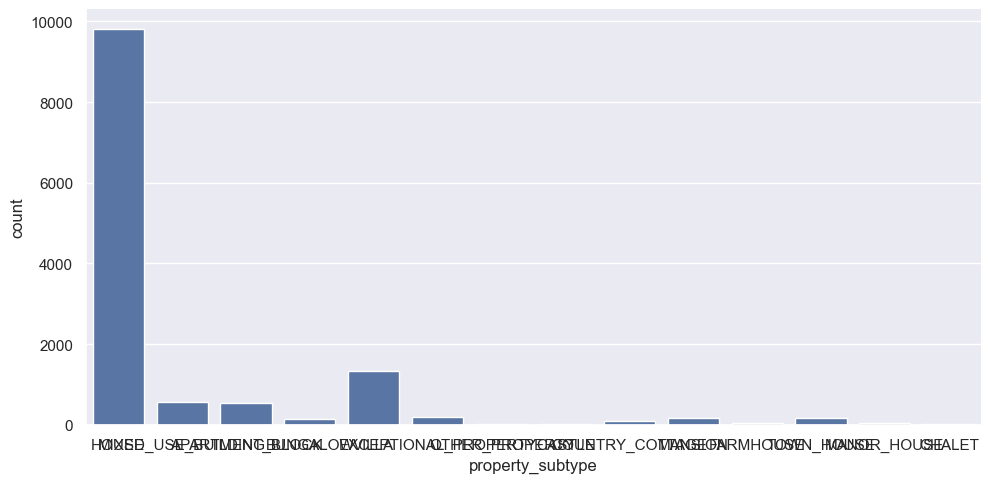

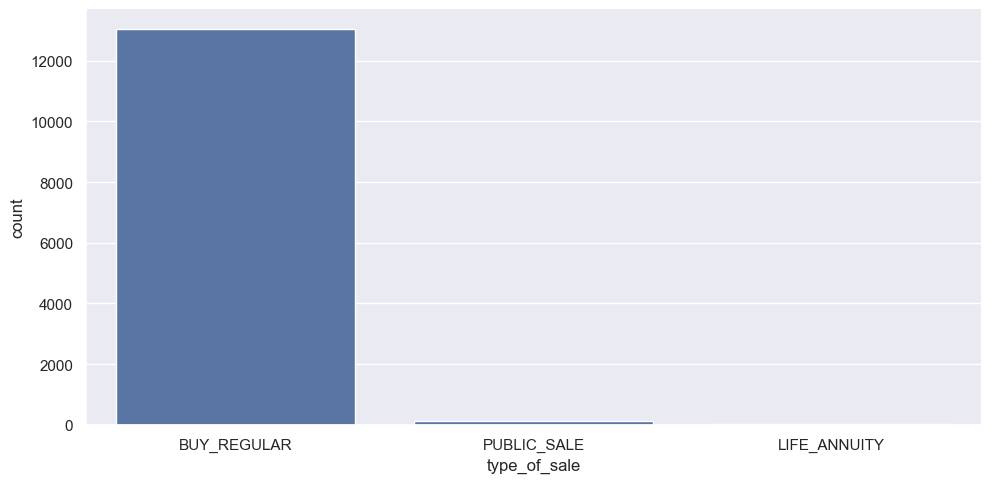

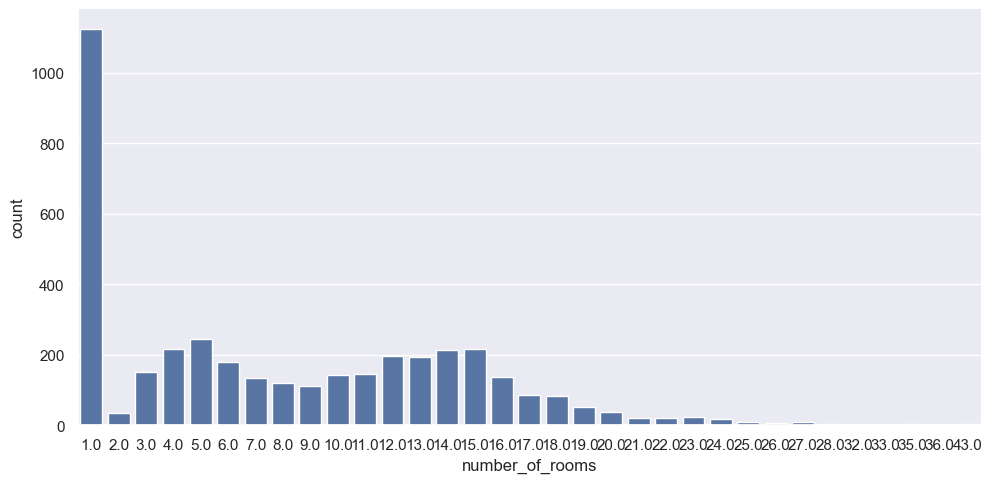

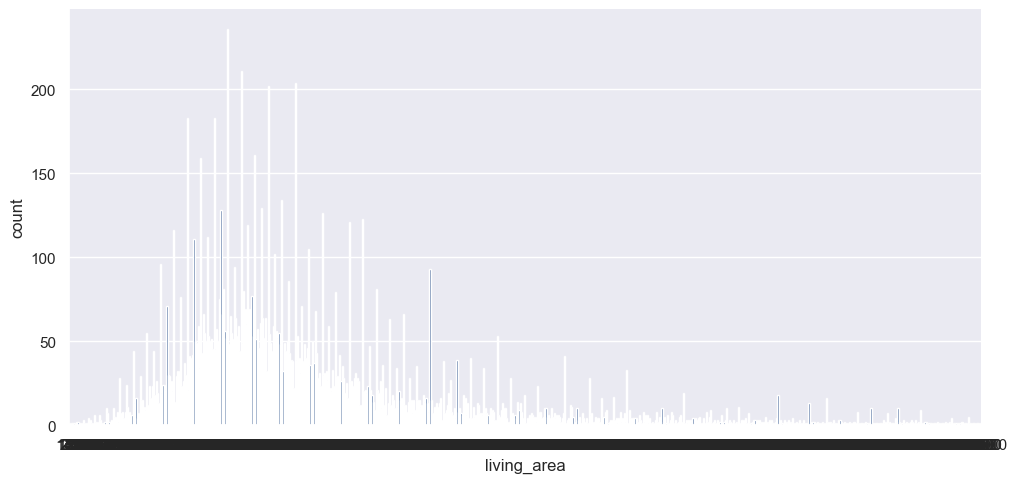

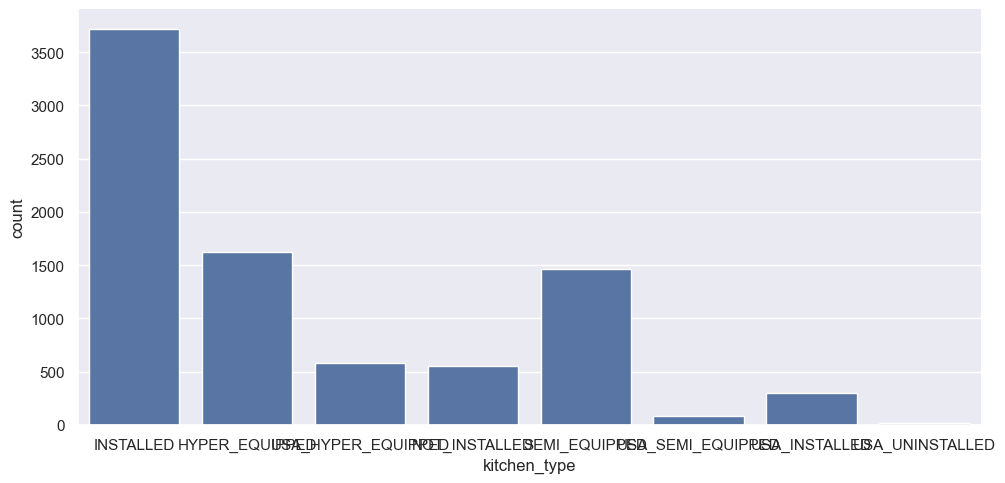

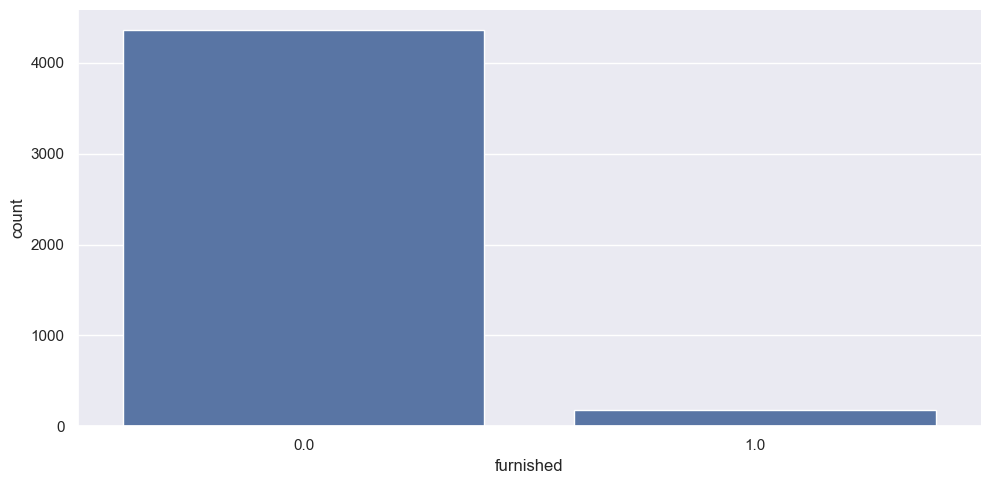

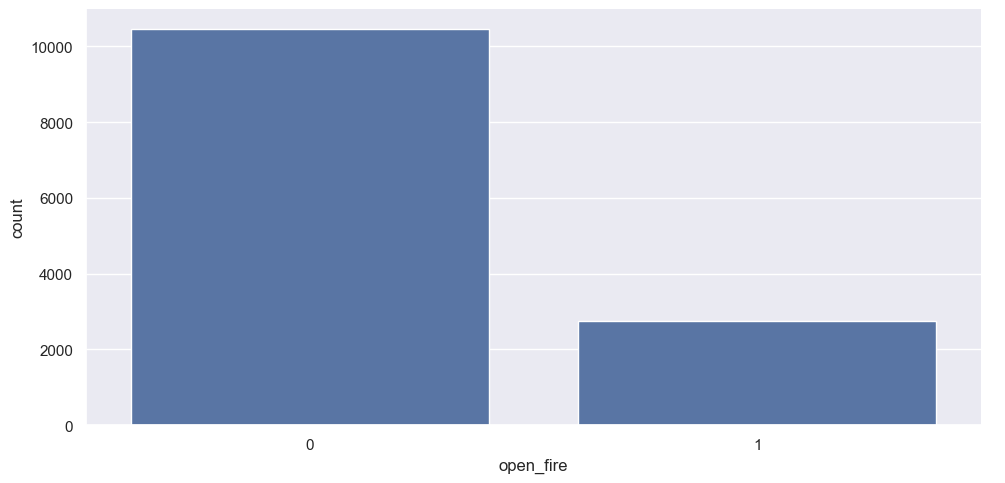

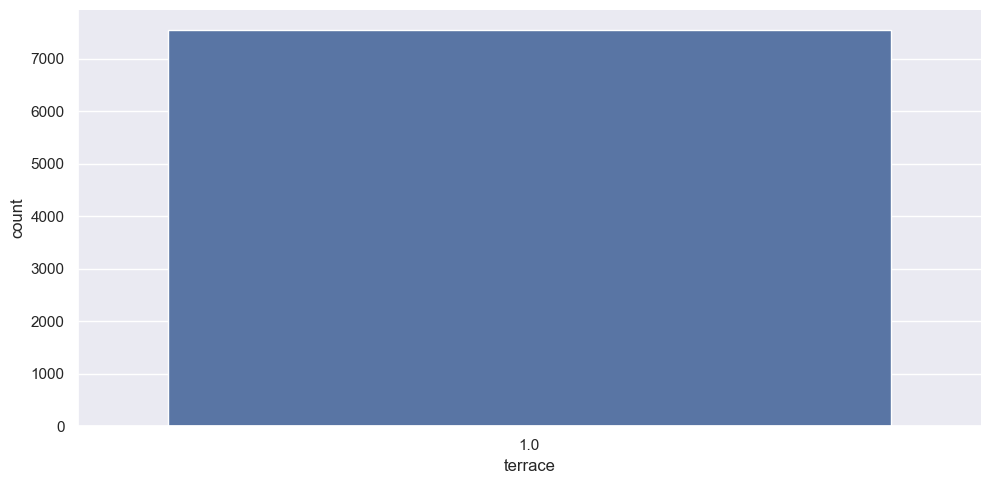

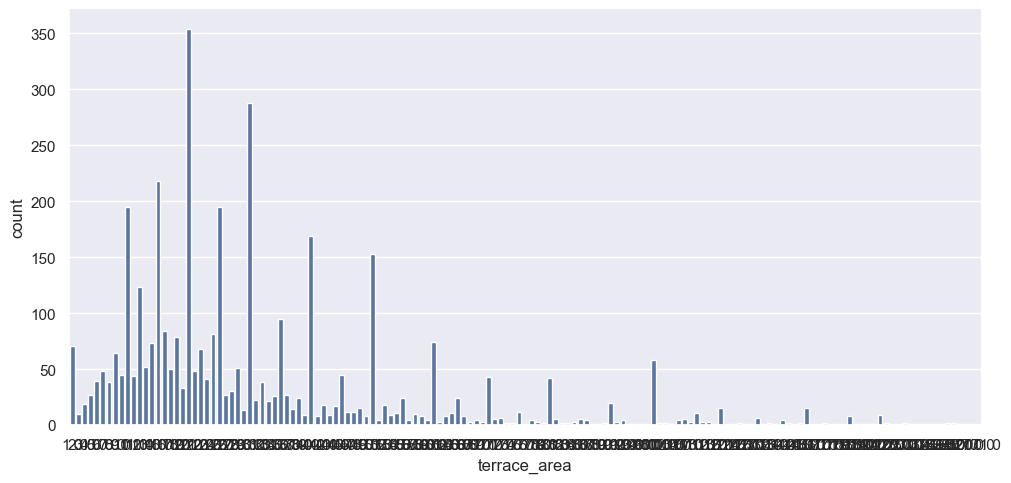

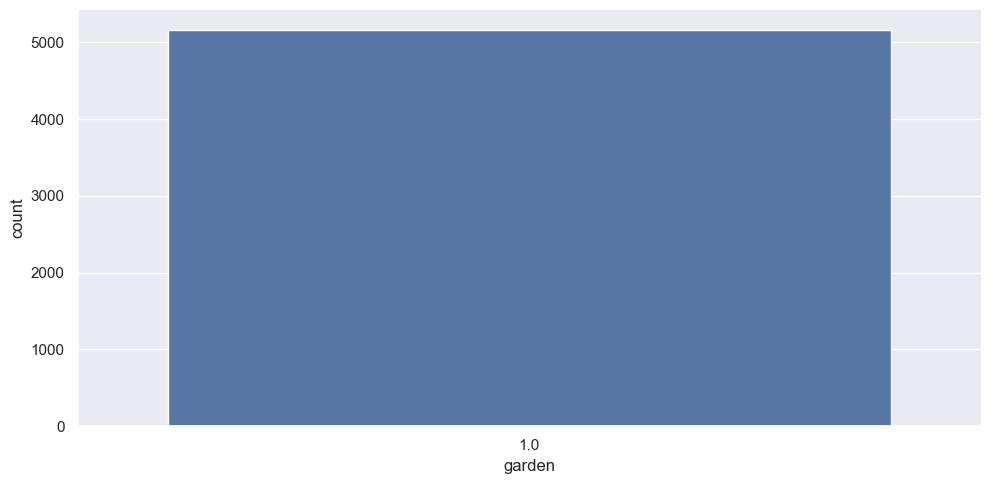

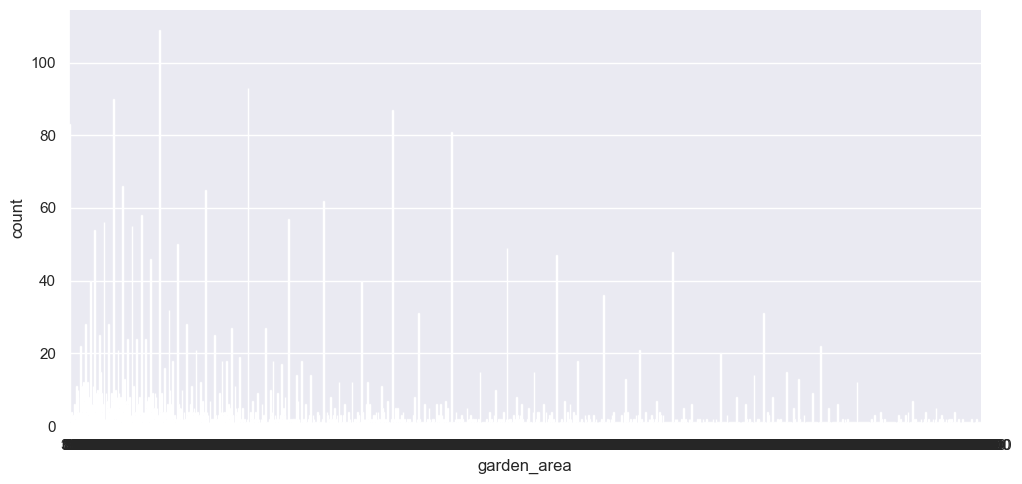

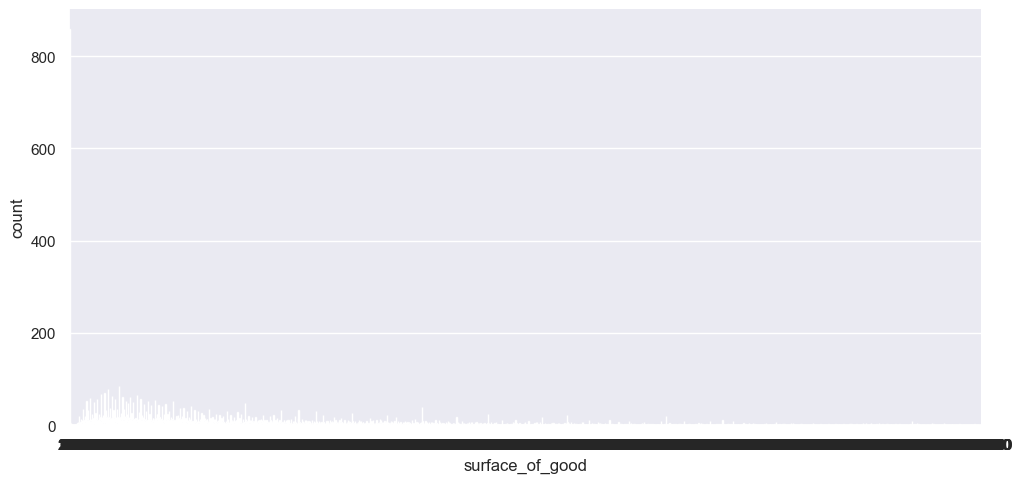

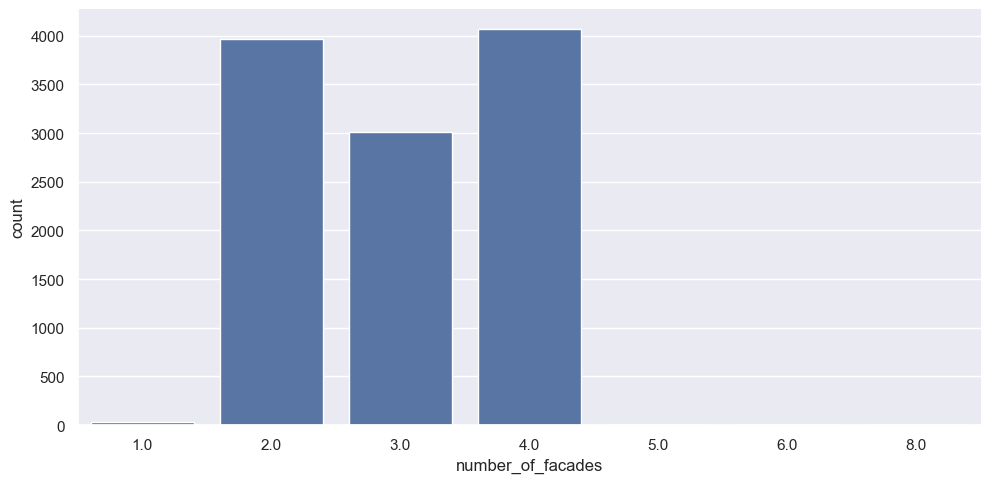

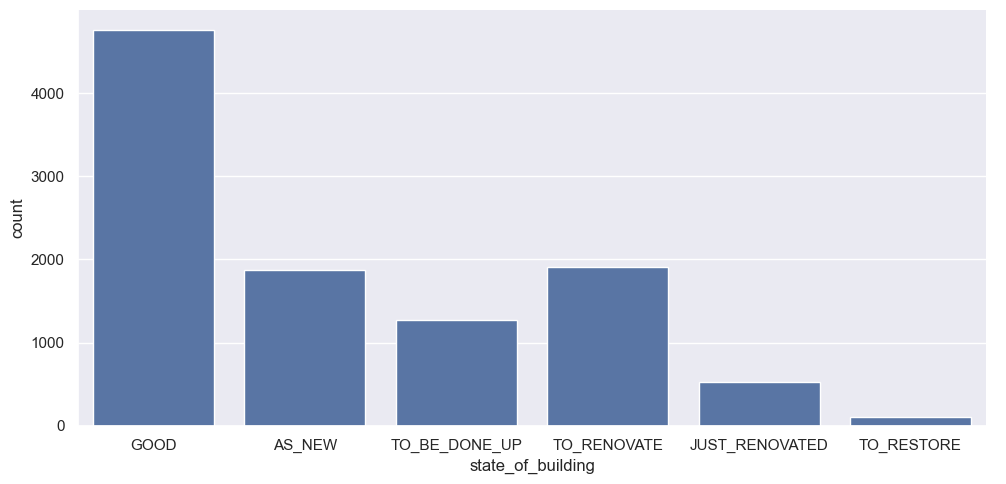

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming house is your DataFrame

# Select only the columns you want
selected_columns = ['property_subtype', 'price', 'type_of_sale',
                    'number_of_rooms', 'living_area', 'kitchen_type',
                    'furnished', 'open_fire', 'terrace',
                    'terrace_area', 'garden', 'garden_area', 'surface_of_good',
                    'number_of_facades', 'swimming_pool', 'state_of_building']

# Create figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Iterate through each selected column and create a subplot
for i, column in enumerate(selected_columns):
    # Skip plotting if the column is 'price' since it's continuous
    if column == 'price':
        continue
    
    # Create a catplot for the current column
    sns.catplot(data=house, x=column, kind='count', ax=axes[i], aspect=2)
    
    # Set the x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Set the title of the subplot
    axes[i].set_title(column)

# Add the price plot as the 16th subplot
sns.histplot(data=house, x='price', ax=axes[-1], kde=True, bins=20, color='skyblue')
axes[-1].set_title('Price')

# Format the price axis
def format_price_tick(x, pos):
    return f'{x:,.0f}'  # Format the price as comma-separated and without decimal places

formatter = FuncFormatter(format_price_tick)
axes[-1].xaxis.set_major_formatter(formatter)

# Remove the extra subplot
plt.close(len(selected_columns) - 1)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


/home/miubuntu/home/immo-eliza-scraping-immozila-Cleaning-EDA/.venv/lib/python3.10/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


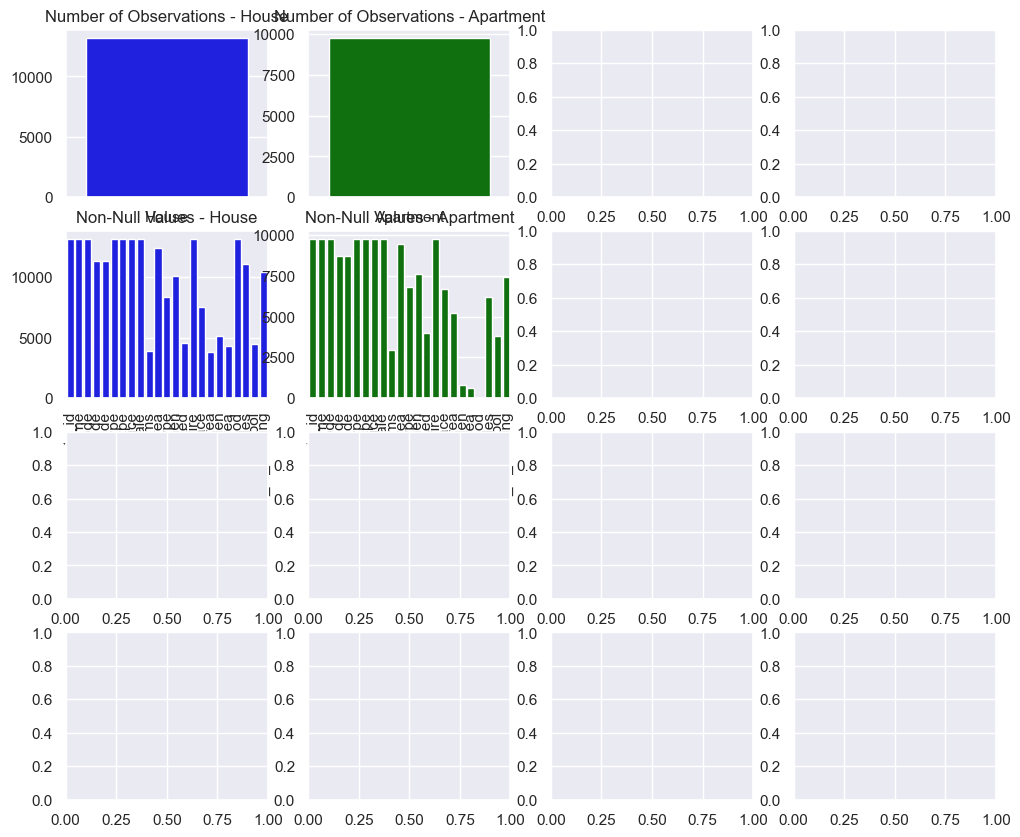

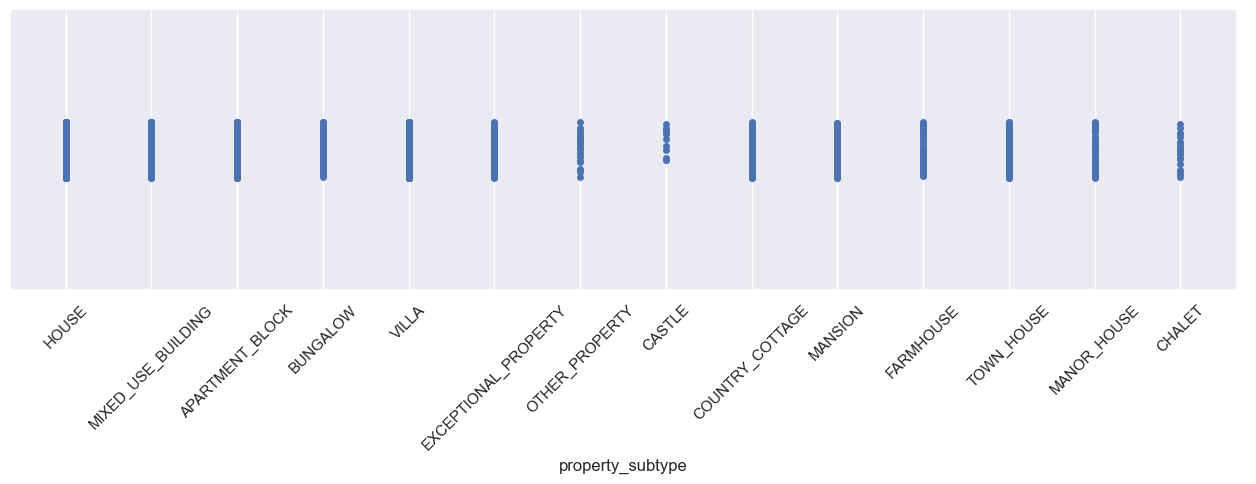

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

## setting the theme
sns.set_theme(style="darkgrid") 


'property_subtype', 'price', 'type_of_sale',
'number_of_rooms', 'living_area', 'kitchen_type',
'furnished', 'open_fire', 'terrace',
'terrace_area', 'garden', 'garden_area', 'surface_of_good',
'number_of_facades', 'swimming_pool', 'state_of_building'

# Create figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 10))

sns.catplot(data=house, x='property_subtype', ax=axes[0, 0], aspect=2.5)
plt.xticks(rotation=45)  # Adjust the rotation here
axes[0, 0].set_title('Property_subtype')





sns.barplot(x=['House'], y=[len(house)], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Number of Observations - House')

# Plot 2: Number of observations for apartment dataset
sns.barplot(x=['Apartment'], y=[len(app)], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Number of Observations - Apartment')

# Plot 3: Number of non-null values for each feature in house dataset
count_house = count_non_null_values(house)
sns.barplot(x=count_house.index, y=count_house.values, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Non-Null Values - House')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Number of non-null values for each feature in apartment dataset
count_apartment = count_non_null_values(app)
sns.barplot(x=count_apartment.index, y=count_apartment.values, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Non-Null Values - Apartment')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


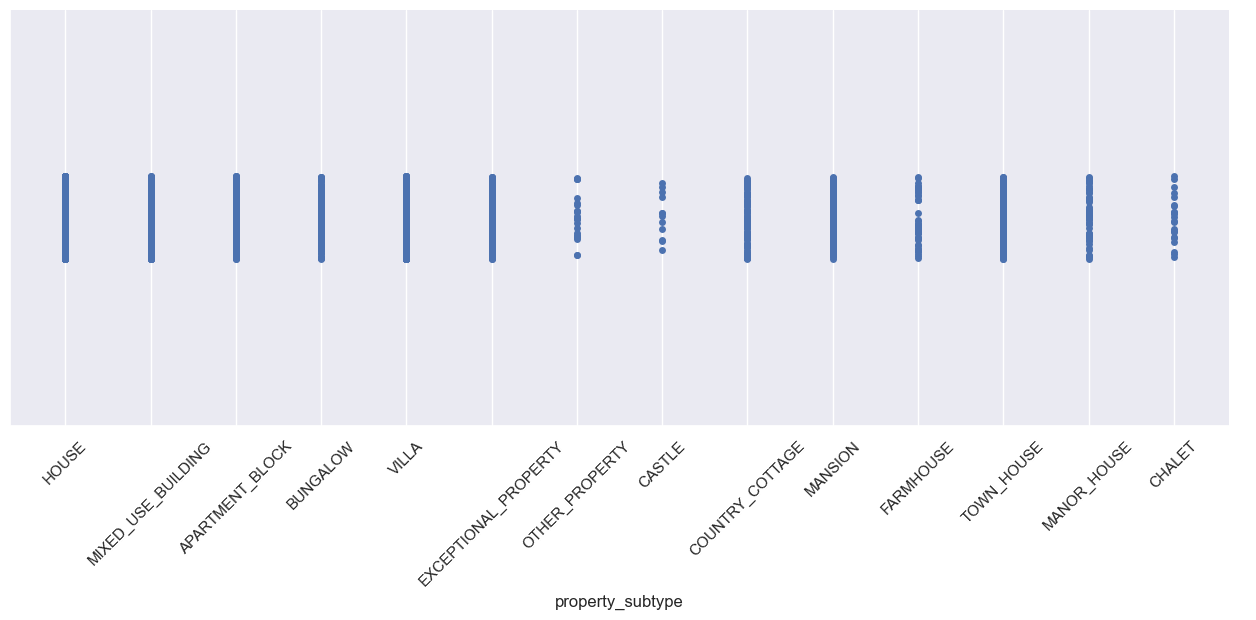

In [12]:
sns.catplot(data=house, x='property_subtype', aspect=2.5)
plt.xticks(rotation=45)  # Adjust the rotation here
plt.show()

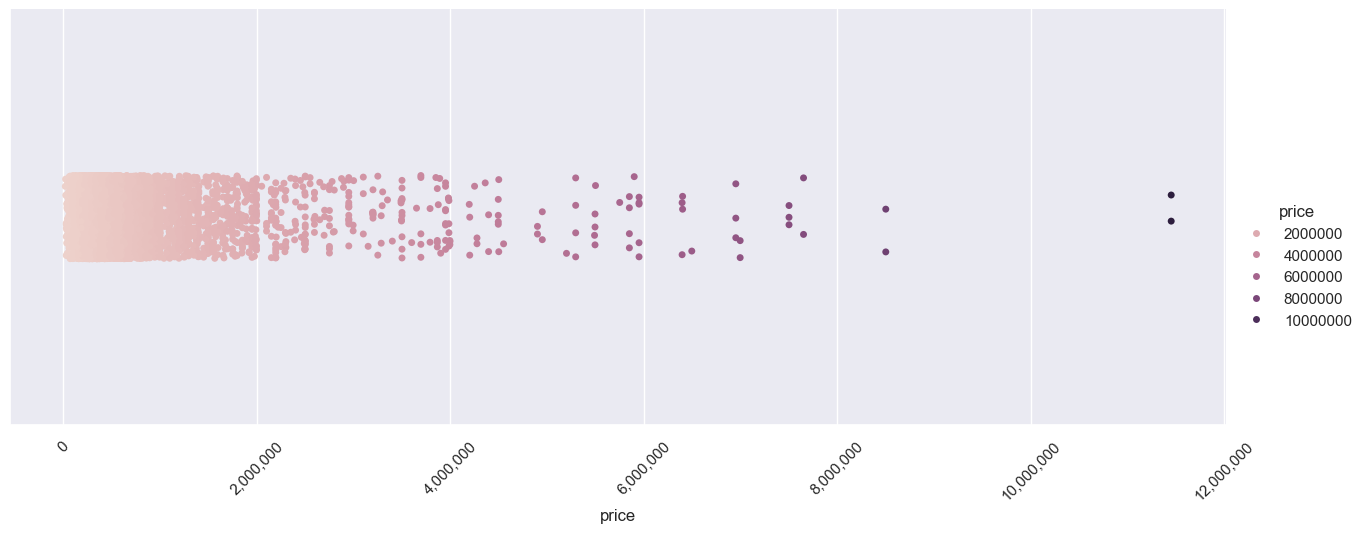

In [13]:
from matplotlib.ticker import FuncFormatter
sns.set_theme(style="darkgrid") 
sns.catplot(data=house, x='price', aspect=2.5, hue='price')
plt.xticks(rotation=45)  # Adjust the rotation here

# Function to format tick labels
def format_price_tick(x, pos):
    return f'{x:,.0f}'  # Format the price as comma-separated and without decimal places

# Apply the custom tick formatter
formatter = FuncFormatter(format_price_tick)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

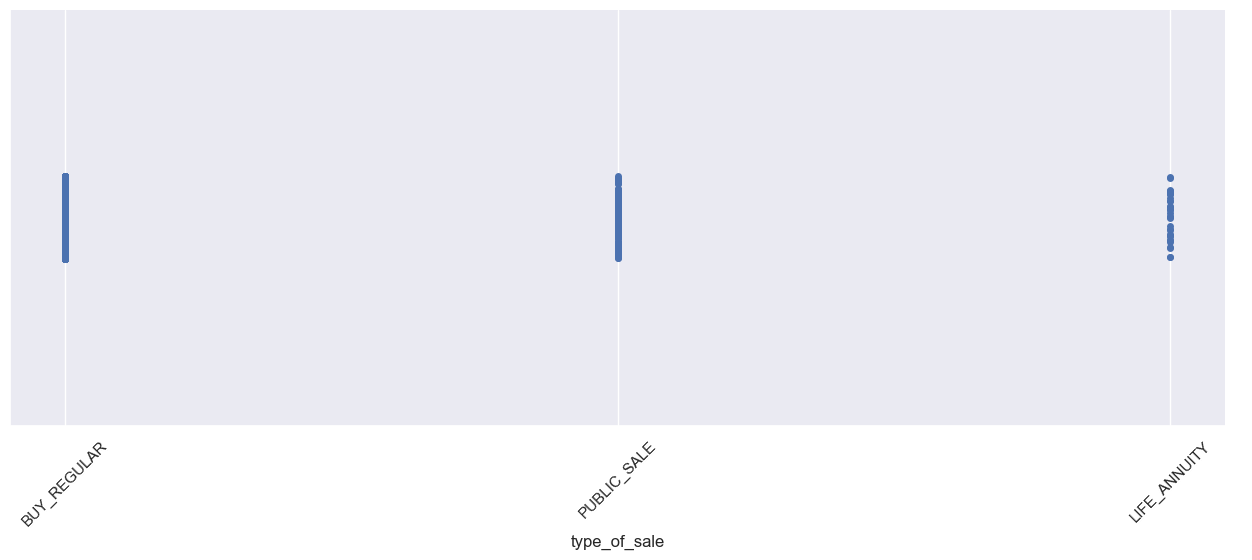

In [14]:
sns.catplot(data=house, x='type_of_sale', aspect=2.5)
plt.xticks(rotation=45)  # Adjust the rotation here
plt.show()

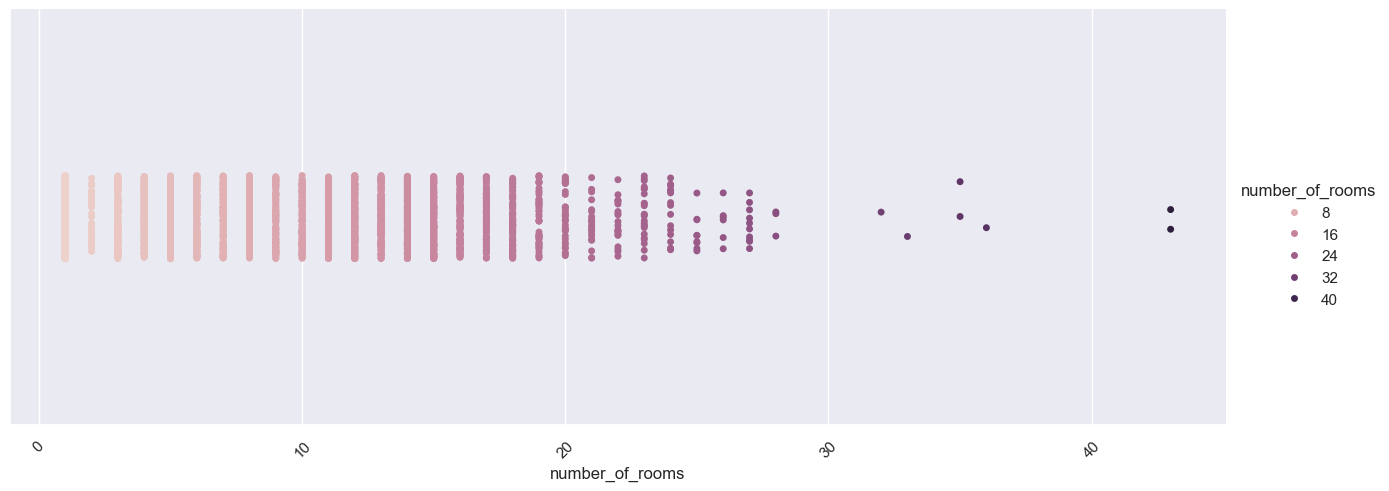

In [15]:
sns.catplot(data=house, x='number_of_rooms', aspect=2.5, hue='number_of_rooms')
plt.xticks(rotation=45)  # Adjust the rotation here
plt.show()

<Axes: title={'center': 'Immo Houses'}>

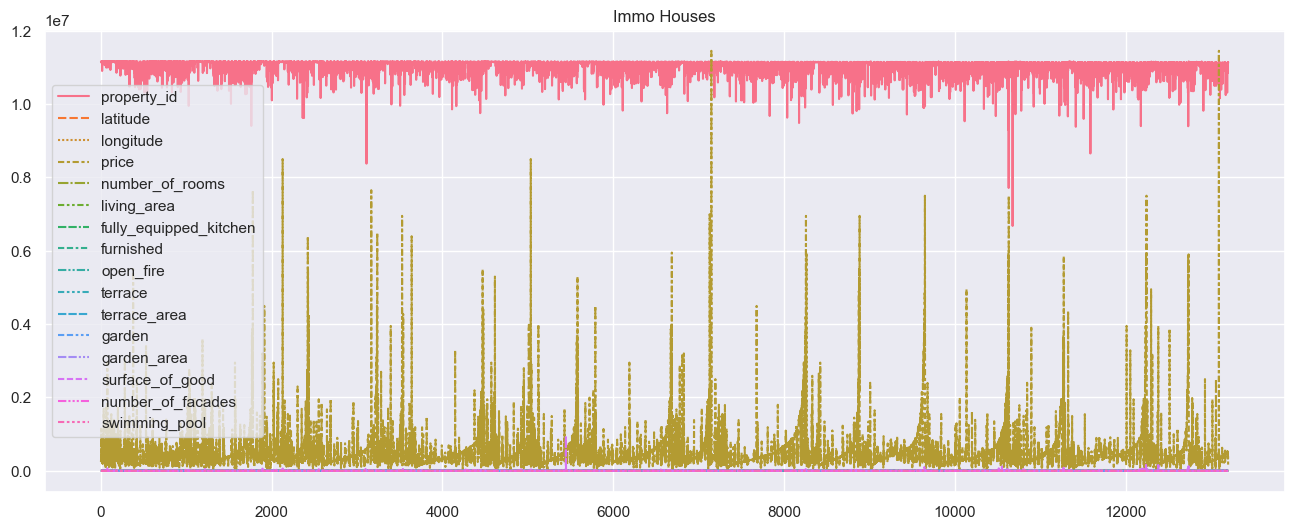

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title("Immo Houses")
sns.lineplot(data=house)
# sns.catplot(data=house)



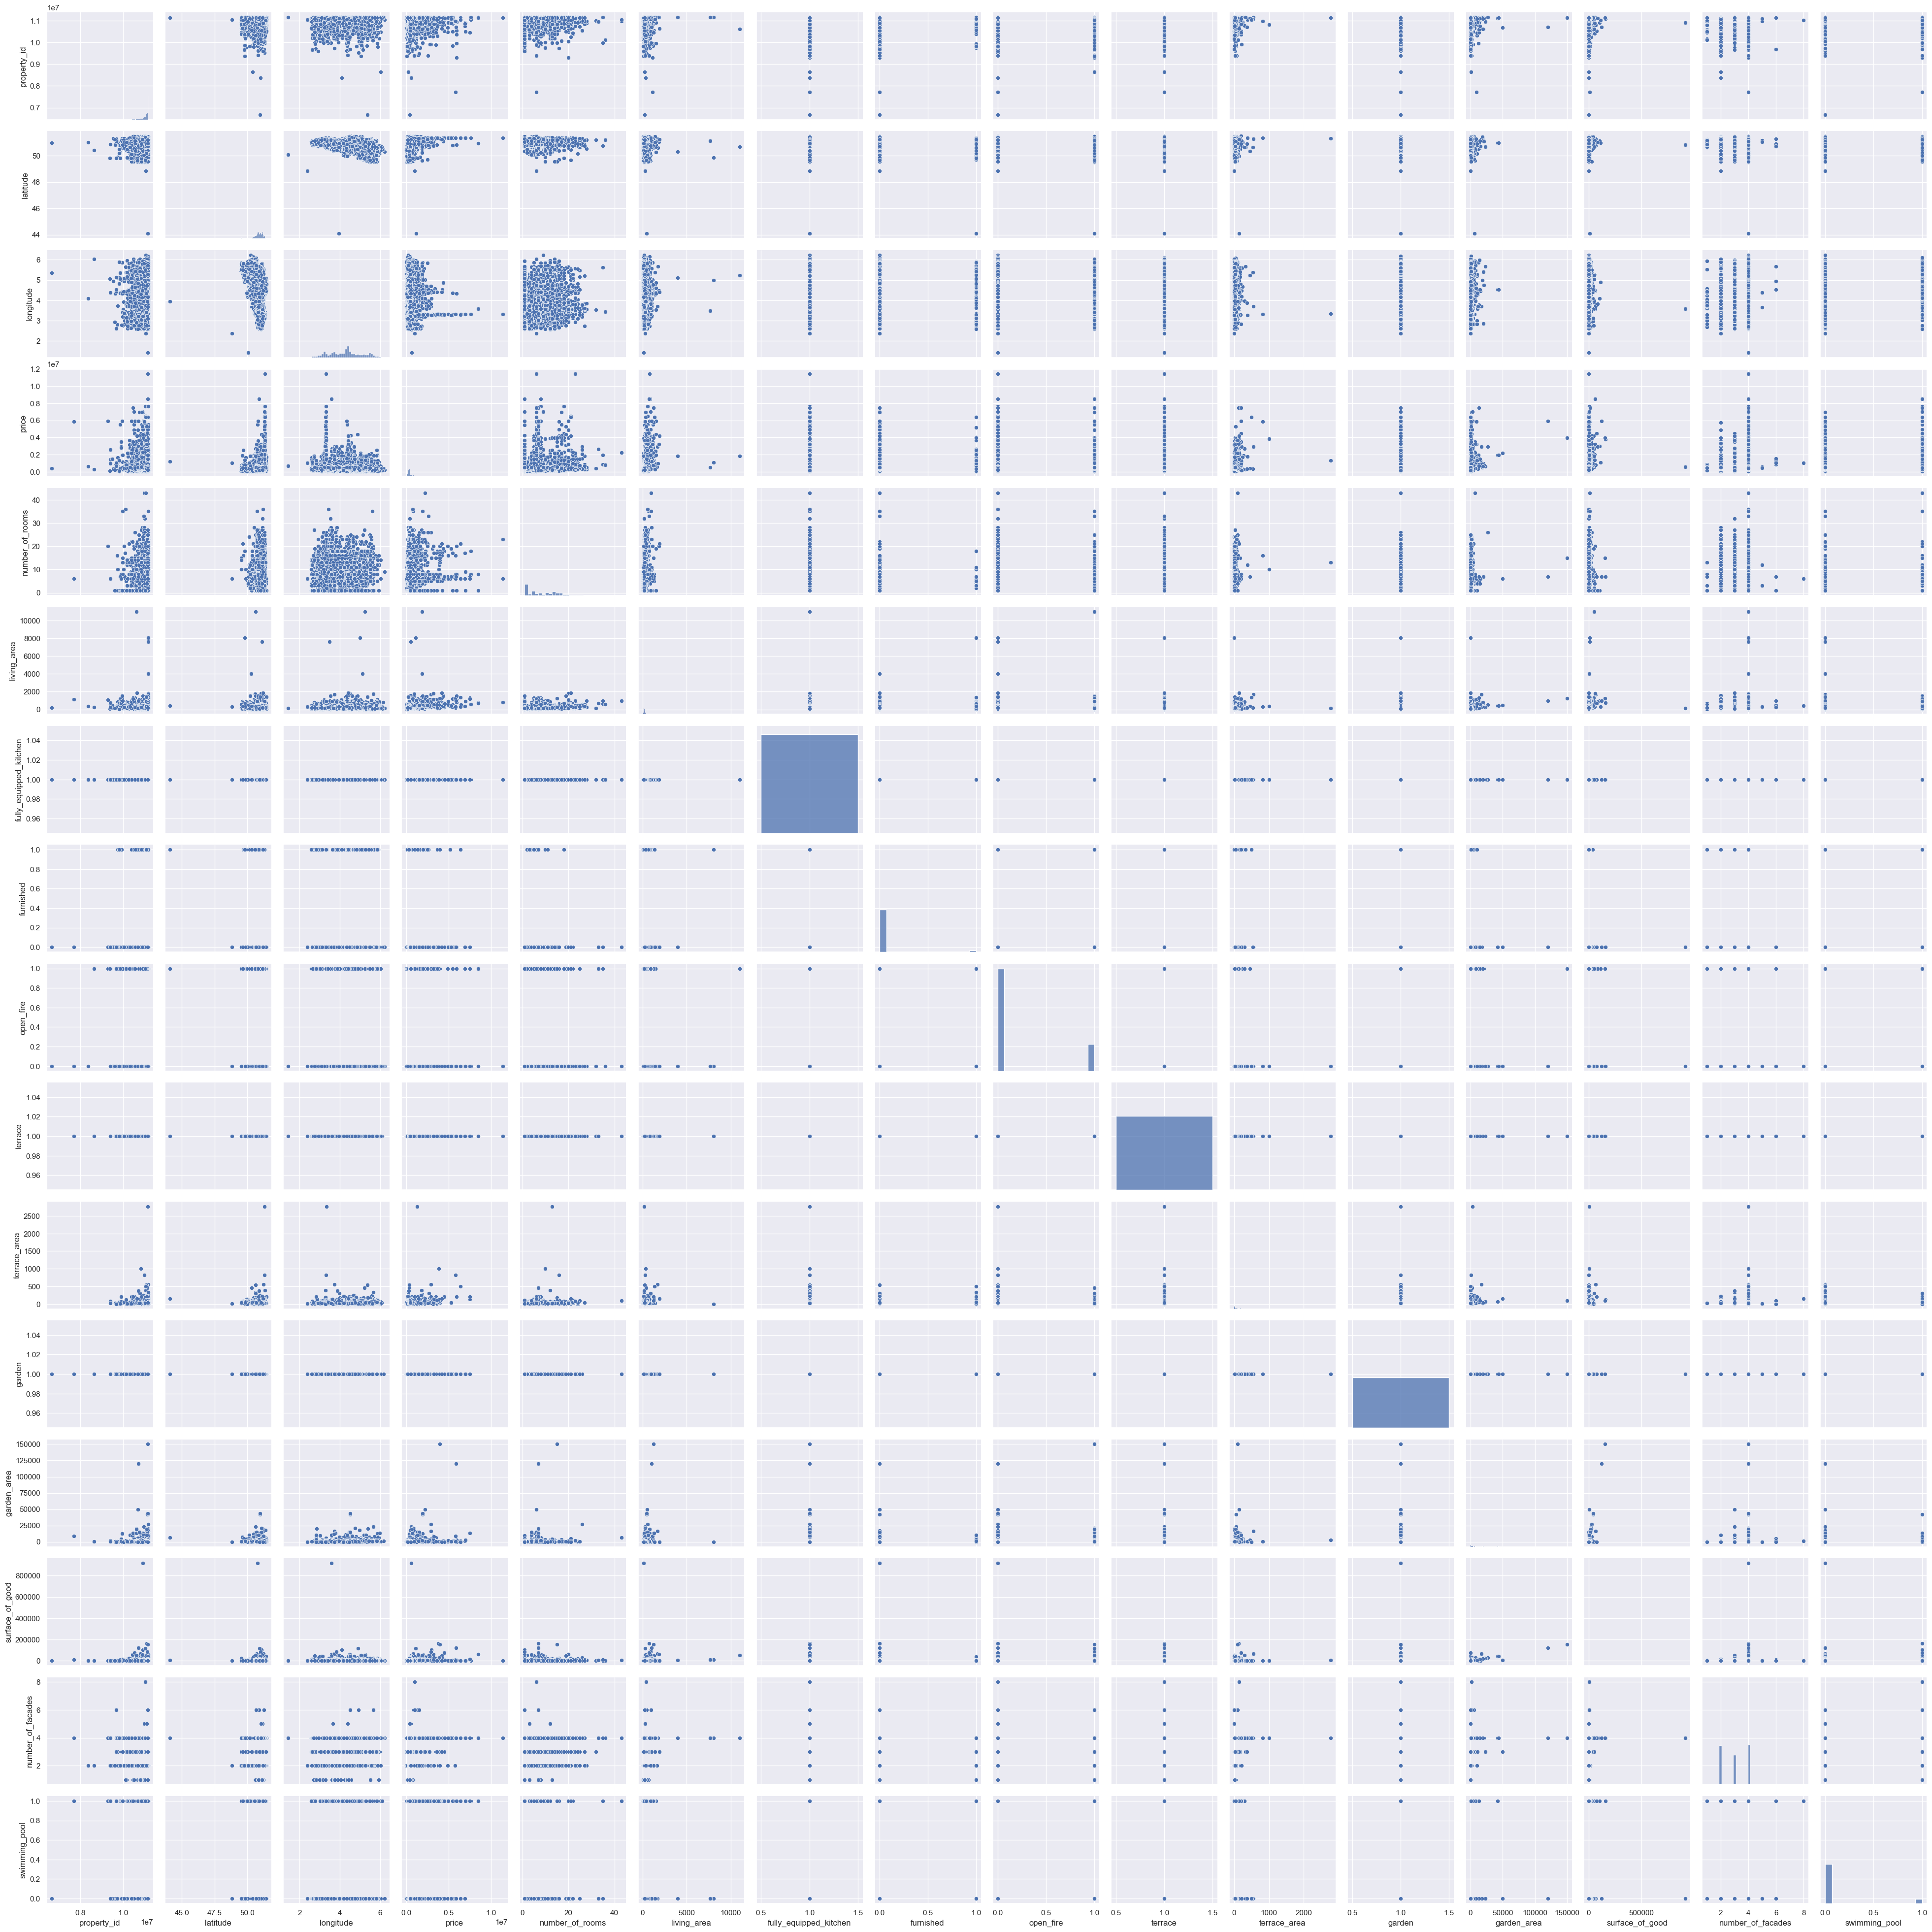

In [17]:
sns.pairplot(house)